In [ ]:
!pip install diffusers transformers scipy ftfy accelerate
!pip install torch --upgrade
!pip install torchvision --upgrade
!pip install fastai --upgrade

from diffusers import DiffusionPipeline, UNet2DConditionModel, DDIMScheduler, StableDiffusionPipeline
from transformers import CLIPTextModel
from PIL import Image
import torch
import os

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 124.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


## Inference with only U-Net fine-tuned with 10 healthy images model

In [ ]:
model_id="runwayml/stable-diffusion-v1-5"
model_path="/content/drive/MyDrive/CardiacDiff/SD-DB/saved_models/healthy10_unet/checkpoint-400/unet"
num_cols = 3
num_rows = 1

pipe = DiffusionPipeline.from_pretrained(model_id, unet=UNet2DConditionModel.from_pretrained(model_path), dtype=torch.float16)
pipe.safety_checker = None
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

The config attributes {'encoder_hid_dim_type': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

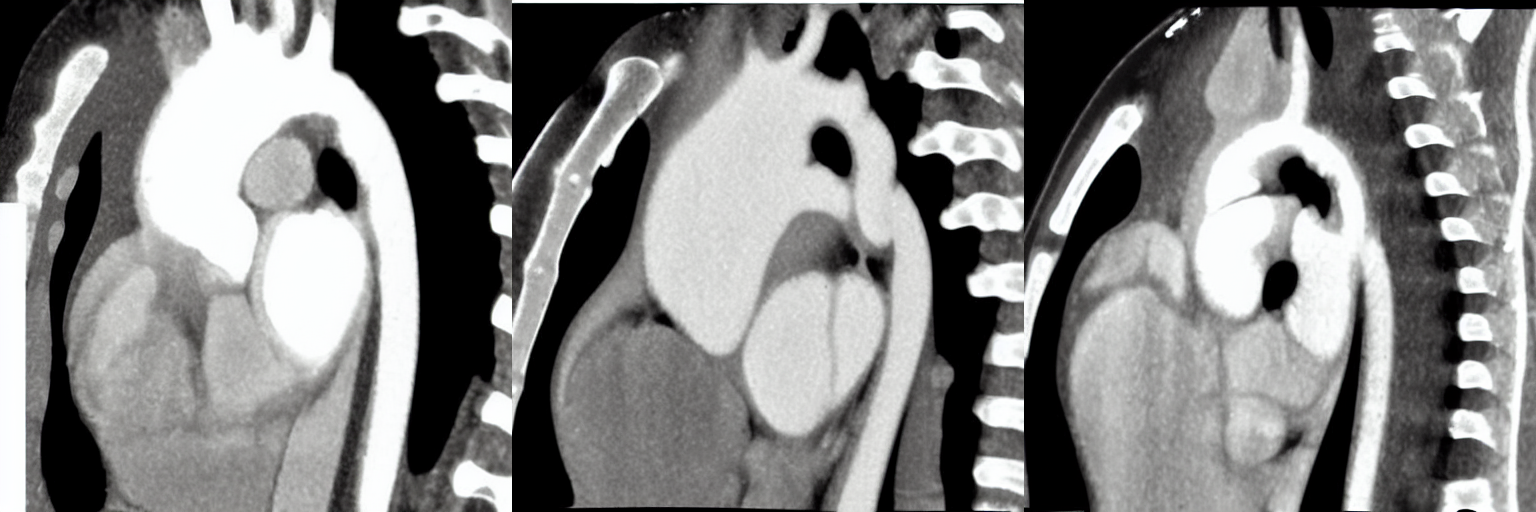

In [ ]:
prompt = ["cardiac tomography"] * num_cols
all_images = []
generator = torch.Generator("cuda")
for i in range(num_rows):
  images = pipe(prompt, generator=generator).images
  all_images.extend(images)
grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

## Inference with only U-Net fine-tuned with 10 coarctation images model

In [ ]:
model_id="runwayml/stable-diffusion-v1-5"
model_path="/content/drive/MyDrive/CardiacDiff/SD-DB/saved_models/coarctation10_unet/checkpoint-800/unet"
num_cols = 3
num_rows = 1

pipe = DiffusionPipeline.from_pretrained(model_id, unet=UNet2DConditionModel.from_pretrained(model_path), dtype=torch.float16)
pipe.safety_checker = None
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

The config attributes {'encoder_hid_dim_type': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

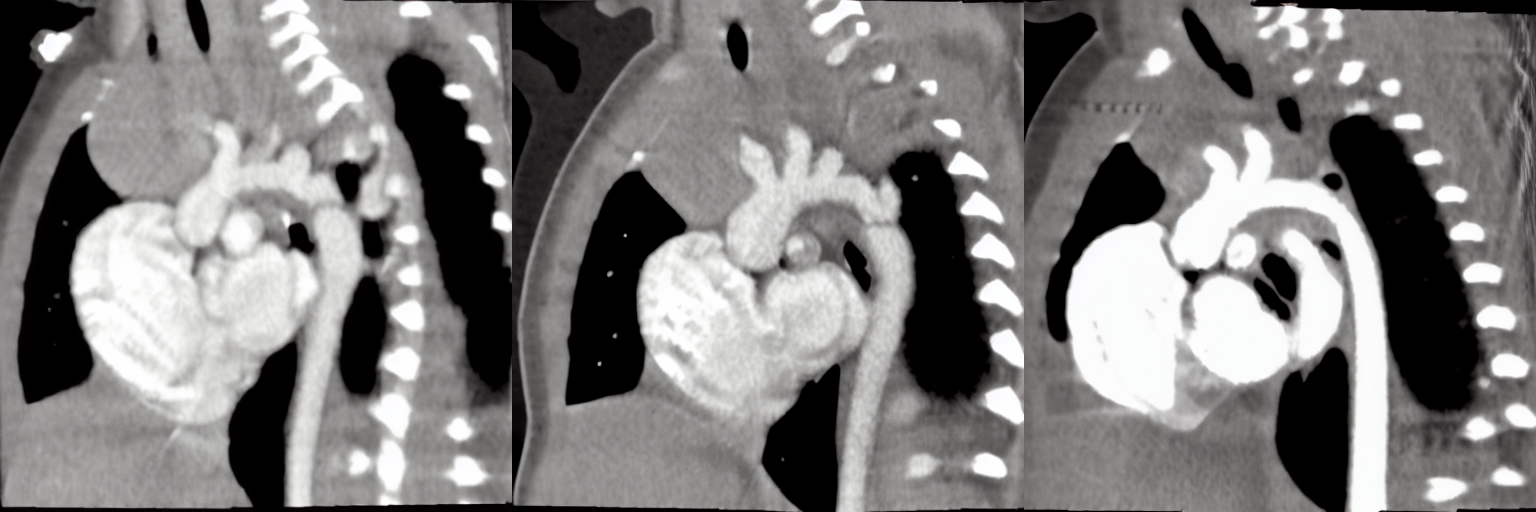

In [ ]:
prompt = ["cardiac tomography with aort coarctation"] * num_cols
all_images = []
generator = torch.Generator("cuda")
for i in range(num_rows):
  images = pipe(prompt, generator=generator).images
  all_images.extend(images)
grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid